# 用途地域

## ライブラリのインストール

In [2]:
pip install -r requirements.txt # type: ignore

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


## shapeファイルの表示

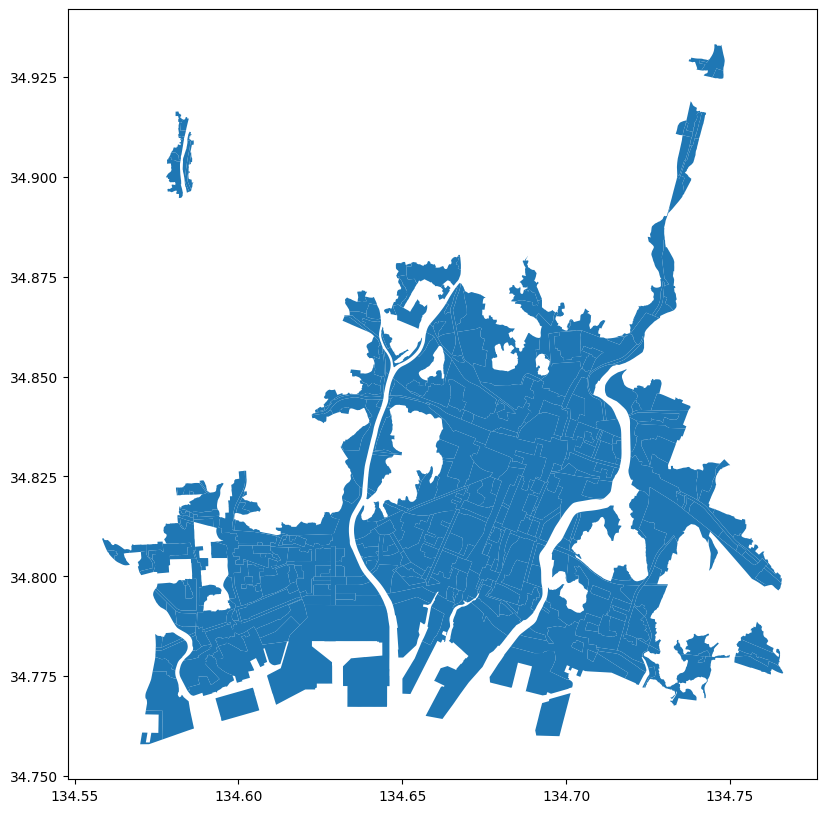

,用途地域,YoutoID,容積率,建ぺい率,Pref,Citycode,Cityname,当初決定日,最終告示日,決定区分,決定者,告示番号S,告示番号L
0,第１種住居地域,5,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
1,第１種中高層住居専用地域,3,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
2,準工業地域,11,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
3,第２種中高層住居専用地域,4,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
4,第１種住居地域,5,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,第２種中高層住居専用地域,4,150.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
405,第１種住居地域,5,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
406,第２種住居地域,6,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号
407,近隣商業地域,9,200.0,60.0,兵庫県,28201,姫路市,NaN,令和5年2月15日,None,None,NaN,姫路市告示第40号


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# shapeファイルのパスを指定
shapefile_path = '../shape_org/28_兵庫県/28201_姫路市/28201_youto.shp'

# shapeファイルを読み込んで表示
gdf = gpd.read_file(shapefile_path)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得（ジオメトリ列を除く）
attr_df = pd.DataFrame(gdf.drop(columns='geometry'))
display(attr_df)



## shapeファイルの結合

### 兵庫県で試行

28_兵庫県ディレクトリ内にある'_douro.shp'ファイルのリストを作成する。

In [2]:
import os
import pprint 

file_list = []
    
for root, dirs, files in os.walk('../shape_org/28_兵庫県'):
    for file in files:
        if file.endswith('.shp') and '_youto' in file:
            file_list.append(os.path.join(root, file))
    
  
pprint.pprint(file_list)

['../shape_org/28_兵庫県\\28100_神戸市\\28100_youto.shp',
 '../shape_org/28_兵庫県\\28201_姫路市\\28201_youto.shp',
 '../shape_org/28_兵庫県\\28202_尼崎市\\28202_youto.shp',
 '../shape_org/28_兵庫県\\28203_明石市\\28203_youto.shp',
 '../shape_org/28_兵庫県\\28204_西宮市\\28204_youto.shp',
 '../shape_org/28_兵庫県\\28205_洲本市\\28205_youto.shp',
 '../shape_org/28_兵庫県\\28206_芦屋市\\28206_youto.shp',
 '../shape_org/28_兵庫県\\28207_伊丹市\\28207_youto.shp',
 '../shape_org/28_兵庫県\\28208_相生市\\28208_youto.shp',
 '../shape_org/28_兵庫県\\28209_豊岡市\\28209_youto.shp',
 '../shape_org/28_兵庫県\\28210_加古川市\\28210_youto.shp',
 '../shape_org/28_兵庫県\\28212_赤穂市\\28212_youto.shp',
 '../shape_org/28_兵庫県\\28213_西脇市\\28213_youto.shp',
 '../shape_org/28_兵庫県\\28214_宝塚市\\28214_youto.shp',
 '../shape_org/28_兵庫県\\28215_三木市\\28215_youto.shp',
 '../shape_org/28_兵庫県\\28216_高砂市\\28216_youto.shp',
 '../shape_org/28_兵庫県\\28217_川西市\\28217_youto.shp',
 '../shape_org/28_兵庫県\\28218_小野市\\28218_youto.shp',
 '../shape_org/28_兵庫県\\28219_三田市\\28219_youto.shp',
 '../shape_

全市区町村のshapeファイルを結合する。

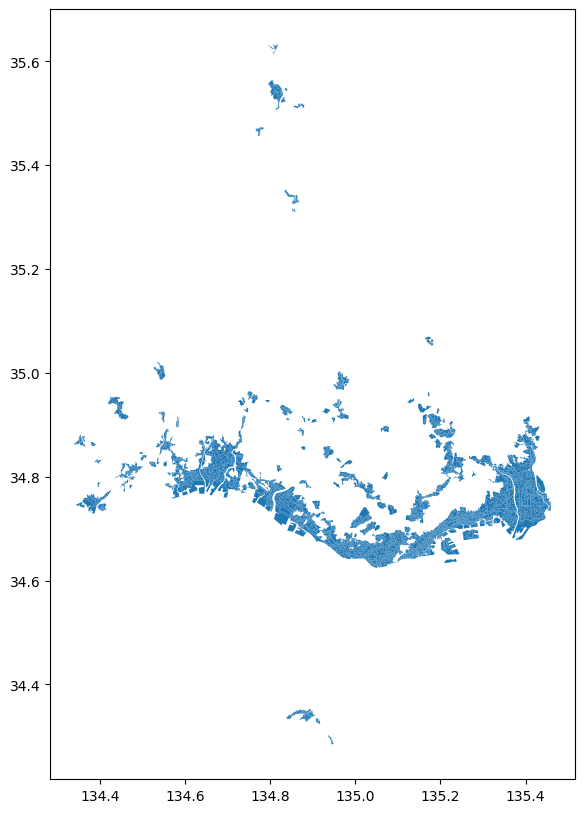

,用途地域,YoutoID,容積率,建ぺい率,Pref,Citycode,Cityname,当初決定日,最終告示日,決定区分,決定者,告示番号S,告示番号L
0,工業専用地域,13,200.0,60.0,兵庫県,28100,神戸市,NaN,None,None,None,NaN,None
1,準工業地域,11,200.0,60.0,兵庫県,28100,神戸市,NaN,None,None,None,NaN,None
2,第１種低層住居専用地域,1,80.0,40.0,兵庫県,28100,神戸市,NaN,None,None,None,NaN,None
3,第１種中高層住居専用地域,3,200.0,60.0,兵庫県,28100,神戸市,NaN,None,None,None,NaN,None
4,第１種低層住居専用地域,1,80.0,40.0,兵庫県,28100,神戸市,NaN,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,第２種住居地域,6,200.0,60.0,兵庫県,28481,上郡町,NaN,2018-12-14,None,None,NaN,None
4600,準工業地域,11,200.0,60.0,兵庫県,28481,上郡町,NaN,2018-12-14,None,None,NaN,None
4601,第１種中高層住居専用地域,3,150.0,60.0,兵庫県,28481,上郡町,NaN,2018-12-14,None,None,NaN,None
4602,工業地域,12,200.0,60.0,兵庫県,28481,上郡町,NaN,2018-12-14,None,None,NaN,None


In [5]:
import geopandas as gpd
import pandas as pd


# shapeファイルを結合    
gdfs = []
for file in file_list:
    gdf = gpd.read_file(file, encoding='shift-jis')
    gdfs.append(gdf)

merged_gdf = pd.concat(gdfs, ignore_index=True)
    

# GeoDataFrameを表示
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf .plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得（ジオメトリ列を除く）
attr_df = pd.DataFrame(merged_gdf.drop(columns='geometry'))
display(attr_df)


属性情報「区分」と「Pref」で地物を融合する。

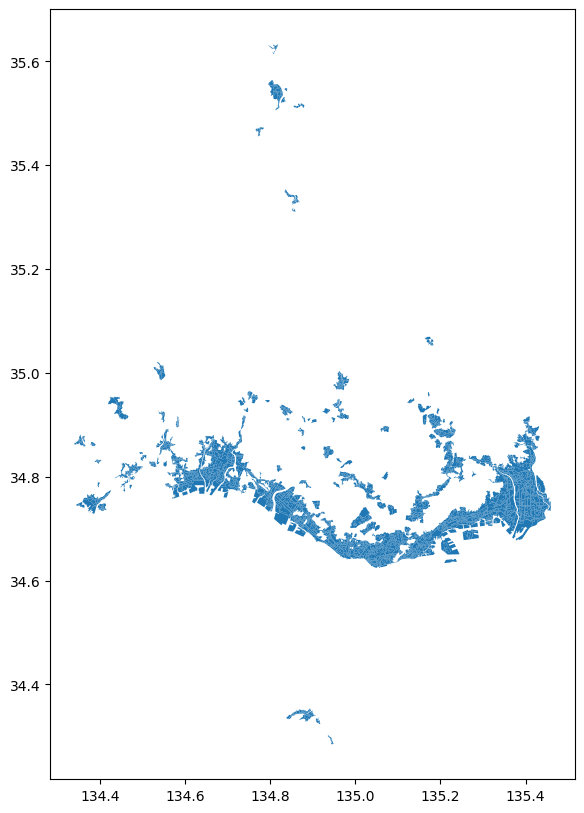

,index,用途地域
0,0,商業地域
1,1,工業地域
2,2,工業専用地域
3,3,準住居地域
4,4,準工業地域
5,5,第１種中高層住居専用地域
6,6,第１種低層住居専用地域
7,7,第１種住居地域
8,8,第２種中高層住居専用地域
9,9,第２種低層住居専用地域


In [26]:
import geopandas as gpd

# '用途地域'でグループ化し、ジオメトリのみを融合
dissolved_gdf = merged_gdf.groupby('用途地域')['geometry'].agg(lambda x: x.union_all())
dissolved_gdf = gpd.GeoDataFrame(geometry=dissolved_gdf, crs=merged_gdf.crs)
dissolved_gdf = dissolved_gdf.reset_index()

# 'Pref' 列の名前を '都道府県' に変更
dissolved_gdf = dissolved_gdf.rename(columns={'Pref': '都道府県'})

# GeoDataFrameを表示
fig, ax = plt.subplots(figsize=(10, 10))
dissolved_gdf.plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得（ジオメトリ列を除く）
attr_df = pd.DataFrame(dissolved_gdf.drop(columns='geometry')).reset_index()
display(attr_df)


In [27]:
# KMLファイルの出力パスを指定
kml_output_path = "youto.kml"


# 座標系を確認し、必要であればWGS84（EPSG:4326）に変換
if dissolved_gdf.crs != "EPSG:4326":
    dissolved_gdf = dissolved_gdf.to_crs("EPSG:4326")


# KMLファイルとして保存
dissolved_gdf.to_file(kml_output_path, driver="KML")
